# Data Science Technology and Systems (11523)

## Name :- Radhey Gawand 

## Student ID :- u3247467

# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

According to me Machine learning is an appropriate solution for this problem due to many reason.
1. The dataset to be used is massive and this is an advatage to ML models as they can learn patterns to make predictions
2. Given the complexity and various factors like weather, holidays , distance that influence the flight time ML models can  
   deal with this type of reationships 
3. The ML models can be linked with real time data to provide customers with better information thus improving the overall customer expirence.# Write your answer here and turn the cell type into markdown

### 2. Formulate the business problem, success metrics, and desired ML output.

Our mission is to improve the user experience for travellers who use our travel booking platform.  
We want to provide real-time predictive data on the likelihood of flight delays due to different factors  
when customers book flights to or from the most significant domestic airports in the United States.

Success metrics are as follows
1. Winning customer heart(Customer satisfaction) :- 
    If after implementation of this system if customer provide positive feedback and reviews then it can be counted as success.

2. Accuracy, Precision and Recall :- 
    This metrics can help helps us to get a better understanding of how the model is working, like how accurately the model is able to predict the flight delay.
    Precision will provides us an understanding of the true positives and recall is the ability to find the correct positive.
    

The desired ML output that we want in this business problem is for the ML model to properly indicate the potential of a flight being delayed.  
The model should be able to integrate wil real time data such as the weather conditions to provide accurate predictions.
The customers should be able to access the information of flight being delayed and the reason behind making the customer satisfaction much better.

### 3. Identify the type of ML problem you’re dealing with.

This is a binary classification problem in which we are trying to predict the delayed variable that is  
    1.The flight getting delayed (1,True)  
    2.The flight not getting delayed (0, False)  
The 1 and 2 are labels that we have assiged so the ML algorithm can make predictions

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
# Importing the addition libraries used to extract the csv files 

import glob
import fnmatch
import zipfile

C:\Users\Radhey\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

#### Extract CSV files from ZIP files

In [2]:
# Defining the path where zipped data files and unzipped data files are present

path_zip = 'data_compressed/'
path_unzip = 'Data_uncompressed/'

In [3]:
# Define the path where your ZIP files are located
zip_files = glob.glob('data_compressed/*.zip')

# Extracting the zip files 
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('Data_uncompressed/')
print("Files Extracted")

Files Extracted


In [4]:
# How many csv files have we extracted? write a code to answer it.
lst = os.listdir(path_unzip) 
number_all_files = len(lst)
print("Total Number of files",number_all_files)
number_csv_files =  len(fnmatch.filter(os.listdir(path_unzip), '*.csv'))
print("Total Number of csv files",number_csv_files)

Total Number of files 61
Total Number of csv files 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [5]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{path_unzip}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [6]:
# Load 1 csv file to get a better understanding of the data

df_temp = pd.read_csv("Data_uncompressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv") # **ENTER YOUR CODE HERE**

In [7]:
df_temp['Reporting_Airline'].value_counts()

WN    106972
DL     78075
AA     75129
OO     62749
UA     52905
YX     25617
MQ     24836
B6     24427
OH     22939
AS     21129
9E     19676
YV     18926
EV     15456
NK     13917
F9     10352
HA      6920
G4      5724
Name: Reporting_Airline, dtype: int64

**Question**: Print the row and column length in the dataset, and print the column names.

In [8]:
#Checking the rows and columns
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [9]:
#first 10 rows
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [10]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [11]:
del_col = [col for col in df_temp.columns if 'Del' in col]

#checking the columns with del character present 
print(del_col)

['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [12]:
df_temp.shape

(585749, 110)

In [13]:
df_temp.shape[0]

585749

In [14]:
df_temp.shape[1]

110

In [15]:
df_temp['Month'].unique()

array([9], dtype=int64)

In [16]:
df_temp['FlightDate'].agg(['min', 'max'])

min    2018-09-01
max    2018-09-30
Name: FlightDate, dtype: object

In [17]:
list(df_temp['Origin'].unique())

['DFW',
 'LGA',
 'MSN',
 'MSP',
 'ATL',
 'BDL',
 'VLD',
 'JFK',
 'RDU',
 'CHS',
 'DTW',
 'GRB',
 'PVD',
 'SHV',
 'FNT',
 'PIT',
 'RIC',
 'RST',
 'RSW',
 'CVG',
 'LIT',
 'ORD',
 'JAX',
 'TRI',
 'BOS',
 'CWA',
 'DCA',
 'CHO',
 'AVP',
 'IND',
 'GRR',
 'BTR',
 'MEM',
 'TUL',
 'CLE',
 'STL',
 'BTV',
 'OMA',
 'MGM',
 'TVC',
 'SAV',
 'GSP',
 'EWR',
 'OAJ',
 'BNA',
 'MCI',
 'TLH',
 'ROC',
 'LEX',
 'PWM',
 'BUF',
 'AGS',
 'CLT',
 'GSO',
 'BWI',
 'SAT',
 'PHL',
 'TYS',
 'ACK',
 'DSM',
 'GNV',
 'AVL',
 'BGR',
 'MHT',
 'ILM',
 'MOT',
 'IAH',
 'SBN',
 'SYR',
 'ORF',
 'MKE',
 'XNA',
 'MSY',
 'PBI',
 'ABE',
 'HPN',
 'EVV',
 'ALB',
 'LNK',
 'AUS',
 'PHF',
 'CHA',
 'GTR',
 'BMI',
 'BQK',
 'CID',
 'CAK',
 'ATW',
 'ABY',
 'CAE',
 'SRQ',
 'MLI',
 'BHM',
 'IAD',
 'CSG',
 'CMH',
 'MCO',
 'MBS',
 'FLL',
 'SDF',
 'TPA',
 'MVY',
 'LAS',
 'LGB',
 'SFO',
 'SAN',
 'LAX',
 'RNO',
 'PDX',
 'ANC',
 'ABQ',
 'SLC',
 'DEN',
 'PHX',
 'OAK',
 'SMF',
 'SJU',
 'SEA',
 'HOU',
 'STX',
 'BUR',
 'SWF',
 'SJC',
 'DAB',
 'BQN',


In [18]:
# to answer above questions, complete the following code
print("The #rows and #columns are ",df_temp.shape[0] , " and ", df_temp.shape[1])
print("  ")
print("The years in this dataset are: ", df_temp['Year'].nunique())
print("  ")
print("The months covered in this dataset are: ", df_temp['Month'].nunique())
print("  ")
print("The date range for data is :" ,df_temp['FlightDate'].min(), " to ", df_temp['FlightDate'].max())
print("  ")
print("The airlines covered in this dataset are: ", df_temp['Reporting_Airline'].unique())
print("  ")
print("The Origin airports covered are: ", df_temp['Origin'].unique())
print("  ")
print("The Destination airports covered are: ", df_temp['Dest'].unique())

The #rows and #columns are  585749  and  110
  
The years in this dataset are:  1
  
The months covered in this dataset are:  1
  
The date range for data is : 2018-09-01  to  2018-09-30
  
The airlines covered in this dataset are:  ['9E' 'B6' 'WN' 'YV' 'YX' 'EV' 'AA' 'AS' 'DL' 'HA' 'UA' 'F9' 'G4' 'MQ'
 'NK' 'OH' 'OO']
  
The Origin airports covered are:  ['DFW' 'LGA' 'MSN' 'MSP' 'ATL' 'BDL' 'VLD' 'JFK' 'RDU' 'CHS' 'DTW' 'GRB'
 'PVD' 'SHV' 'FNT' 'PIT' 'RIC' 'RST' 'RSW' 'CVG' 'LIT' 'ORD' 'JAX' 'TRI'
 'BOS' 'CWA' 'DCA' 'CHO' 'AVP' 'IND' 'GRR' 'BTR' 'MEM' 'TUL' 'CLE' 'STL'
 'BTV' 'OMA' 'MGM' 'TVC' 'SAV' 'GSP' 'EWR' 'OAJ' 'BNA' 'MCI' 'TLH' 'ROC'
 'LEX' 'PWM' 'BUF' 'AGS' 'CLT' 'GSO' 'BWI' 'SAT' 'PHL' 'TYS' 'ACK' 'DSM'
 'GNV' 'AVL' 'BGR' 'MHT' 'ILM' 'MOT' 'IAH' 'SBN' 'SYR' 'ORF' 'MKE' 'XNA'
 'MSY' 'PBI' 'ABE' 'HPN' 'EVV' 'ALB' 'LNK' 'AUS' 'PHF' 'CHA' 'GTR' 'BMI'
 'BQK' 'CID' 'CAK' 'ATW' 'ABY' 'CAE' 'SRQ' 'MLI' 'BHM' 'IAD' 'CSG' 'CMH'
 'MCO' 'MBS' 'FLL' 'SDF' 'TPA' 'MVY' 'LAS' 'LGB' 'SFO' 'SA

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [19]:
df_temp['Dest'].value_counts()

ATL    31521
ORD    28250
DFW    22795
DEN    19807
CLT    19654
       ...  
OGD        8
OWB        8
PPG        8
STC        5
HYA        4
Name: Dest, Length: 346, dtype: int64

In [20]:
#Getting the count of Origin and Destination 
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [21]:
counts.sort_values(by=['Origin','Destination'],ascending=False).head(15 )# Enter your code here

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Utilizing machine learning and some feature engineering, a predictive model for flight delay analysis can be developed.  
With the use of historical flight data, which includes crucial attributes such as departure/arrival times, airport codes, airline information, the goal is to create a binary classification model can be achived.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [22]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df_comb = pd.DataFrame()
    
    # Loop for the list of csv files
    for csv_file in csv_files:
        
        df = pd.read_csv(csv_file) #read the csv file
        
        df = df[filter_cols]  # filter out the columns as per the filter_cols variable
        
        # Keep only the required cols
        for col, vals in zip(subset_cols, subset_vals):
            df = df[df[col].isin(vals)]
            
        df_comb = pd.concat([df_comb,df],ignore_index = True) # Concat the empty df and the new filter df
    
    #Save the concatenated df
    df_comb.to_csv(file_name, index = False)
    
            
    #<complete the code of this function>

In [23]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

In [24]:
# Path to the folder containing your CSV files
data_folder = 'Data_uncompressed'

# Get a list of CSV files in the folder
csv_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.csv')]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [25]:
start = time.time()

combined_csv_filename = f"combined_files.csv"

combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)# < write code to call the combined_csv function>

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 3.14 minutes


#### Load dataset

Load the combined dataset.

In [26]:
data = pd.read_csv('combined_files.csv')# Enter your code here to read the combined csv file.

Print the first 5 records.

In [27]:
data.head()# Enter your code here 

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


In [28]:
data['Year'].value_counts()

2016    361793
2017    349082
2018    342497
2015    324147
2014    280611
Name: Year, dtype: int64

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [29]:

print("The #rows and #columns are ",data.shape[0] , " and ", data.shape[1])
print("  ")
print("The years in this dataset are: ", data['Year'].nunique())
print("  ")
print("The months covered in this dataset are: ", data['Month'].unique())
print("  ")
print("The date range for data is :" ,data['FlightDate'].min(), " to ", data['FlightDate'].max())
print("  ")
print("The airlines covered in this dataset are: ", data['Reporting_Airline'].unique())
print("  ")
print("The Origin airports covered are: ", data['Origin'].unique())
print("  ")
print("The Destination airports covered are: ", data['Dest'].unique())

The #rows and #columns are  1658130  and  20
  
The years in this dataset are:  5
  
The months covered in this dataset are:  [ 1 10 11 12  2  3  4  5  6  7  8  9]
  
The date range for data is : 2014-01-01  to  2018-12-31
  
The airlines covered in this dataset are:  ['DL' 'OO' 'WN' 'UA' 'AA']
  
The Origin airports covered are:  ['ATL' 'DFW' 'PHX' 'DEN' 'IAH' 'CLT' 'SFO' 'LAX' 'ORD']
  
The Destination airports covered are:  ['IAH' 'ATL' 'DEN' 'PHX' 'CLT' 'LAX' 'DFW' 'SFO' 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [30]:
#Rename the column 
data.rename(columns={"ArrDel15": "is_delay"}, inplace=True) # Enter your code here

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [31]:
data.isnull().sum().sort_values(ascending=False)

AirTime              22540
is_delay             22540
ArrDelayMinutes      22540
ArrDelay             22540
Quarter                  0
DistanceGroup            0
Distance                 0
Diverted                 0
Cancelled                0
CRSDepTime               0
Year                     0
Dest                     0
OriginState              0
Origin                   0
Reporting_Airline        0
FlightDate               0
DayOfWeek                0
DayofMonth               0
Month                    0
DestState                0
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In the below code I have made a copy of the dataset and removed the null values and compared it with the copy to get the difference of rows

In [32]:
import copy

In [33]:
data2 = copy.deepcopy(data)

In [34]:
data.dropna(subset=['AirTime'], inplace=True)

In [35]:
data2.shape[0]-data.shape[0]

22540

Get the hour of the day in 24-hour time format from CRSDepTime.

In [36]:
data['DepHourofDay'] = data['CRSDepTime'].astype(str).str.zfill(4).str[:2]

# Convert the hour component to an integer
data['DepHourofDay'] = data['DepHourofDay'].astype(int)

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

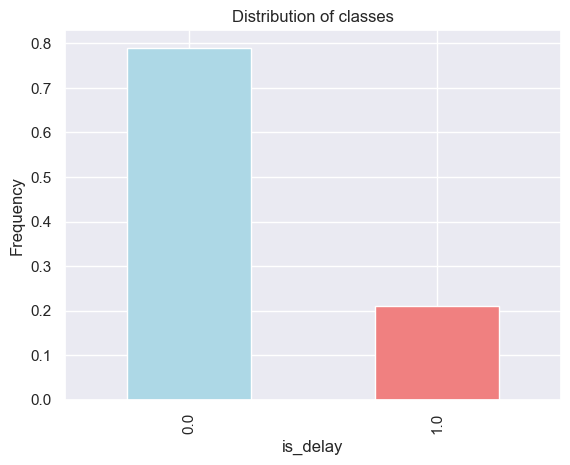

In [37]:
colors = ['lightblue', 'lightcoral']
(data.groupby(['is_delay']).size()/len(data) ).plot(kind='bar', color= colors)
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot illustrates a substantial class imbalance between flight delays and on-time flights.  
Approximately 78% of the instances represent flights with no delays (0), while only around 22% represent delayed flights (1).  
From a business perspective, this provides valuable insights.  
Recognising that the majority of flights operate without delays shows that the system is typically efficient for airlines

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

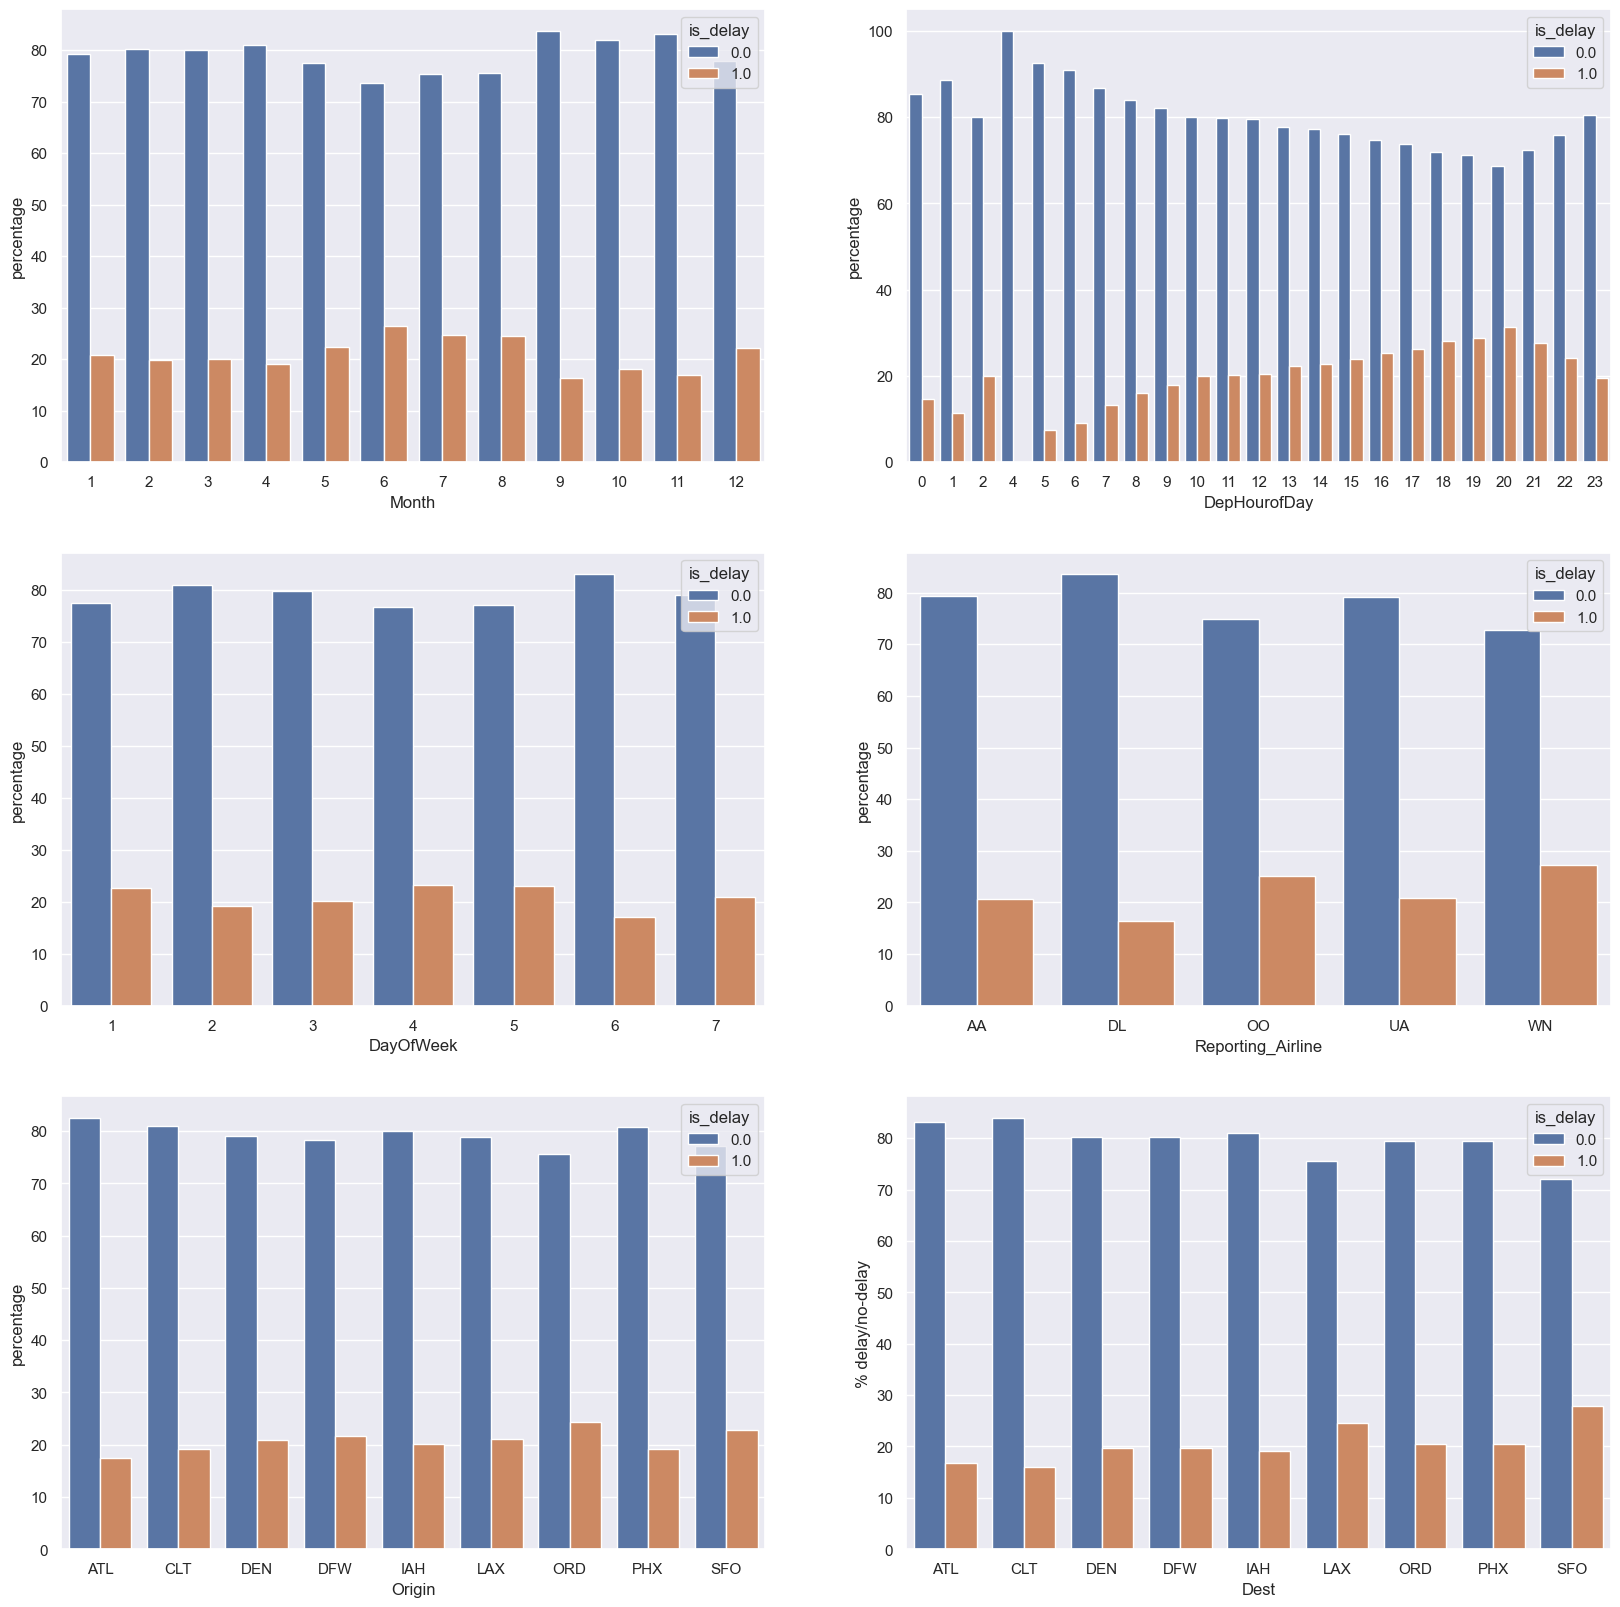

In [38]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

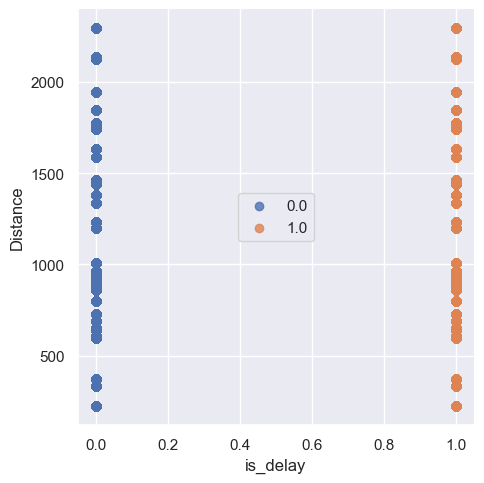

In [39]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

1. Which months have the most delays?

    The months 6, 7, and 8 has the most delays i.e June , July and August.
    
    
2. What time of the day has the most delays?
    
    The most delays is around 20:00 aka 08:00 pm.
    A slow increase in delay is seen from 15:00 aka 3:00 pm and after 20:00 a slow decrease in delay is seen
    
    
3. What day of the week has the most delays?  
    The day which has most delay is 4 also 1,5 and 7 is showing higher rate of delay.
    
    
4. Which airline has the most delays?  
    The airline WN has the most delay and OO airline is also almost near to it
    
    
5. Which origin and destination airports have the most delays?  
    The ORD origin airport has highest delay followed by SFO. 
    The SFO destination airport has the hishest delay followed by LAX.
    
    
6. Is flight distance a factor in the delays?  
    No, accoding to me flight distance is a factor but according to the graph it is not having a great effect on the delay

### Features

Look at all the columns and what their specific types are.

In [40]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [41]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int32
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [42]:
data_orig = data.copy()
#data = data_orig.copy()

In [43]:
#pip install --upgrade numpy

In [44]:
data['DepHourofDay'].unique()

array([21,  9, 18, 16,  7, 14, 12, 17, 20, 10,  8,  6, 15, 11,  0, 13, 19,
       23, 22,  5,  1,  2,  4])

In [45]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

In [46]:
data['DepHourofDay'] = data['DepHourofDay'].apply(categorize_time)

In [47]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,Night
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,Morning
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,Evening
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,Afternoon
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,Morning


In [48]:

data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [49]:
data_dummies = pd.get_dummies(data[['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [50]:
data.shape# Enter your code here

(1635590, 72)

In [51]:
data.columns# Enter your code here

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [52]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [53]:
data.to_csv('combined_csv_v1.csv', index=False) # write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

In [54]:
data_orig2 = data.copy()

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

### Train test split

In [57]:
X = data.drop('target', axis=1)
y = data['target']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# write Code here to split data into train, validate and test

### Baseline classification model

In [59]:
# Create a Logistic Regression model
model1 = LogisticRegression(max_iter=1000)

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model1.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)# <write code here>

In [60]:
accuracy

0.7899932134581404

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [61]:
def plot_confusion_classification(y_test, y_pred, model_name="Model"):
    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Display the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Calculate and display the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print((f"{round(accuracy*100,2)}% Accurate"))

   

In [62]:
def plot_confusion_matrix(y_test, y_pred, model_name="Model"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


In [63]:
def plot_roc(y_test, y_pred, model_name="Model"):
    # Calculate and plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label='ROC curve')
    sns.lineplot(x=[0, 1], y=[0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    auc = roc_auc_score(y_test, y_pred)
    plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12)
    plt.legend(loc="lower right")
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

In [64]:
plot_confusion_classification(y_test, y_pred, model_name="model1")# Enter you code here

[[258421      0]
 [ 68697      0]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258421
         1.0       0.00      0.00      0.00     68697

    accuracy                           0.79    327118
   macro avg       0.39      0.50      0.44    327118
weighted avg       0.62      0.79      0.70    327118

79.0% Accurate


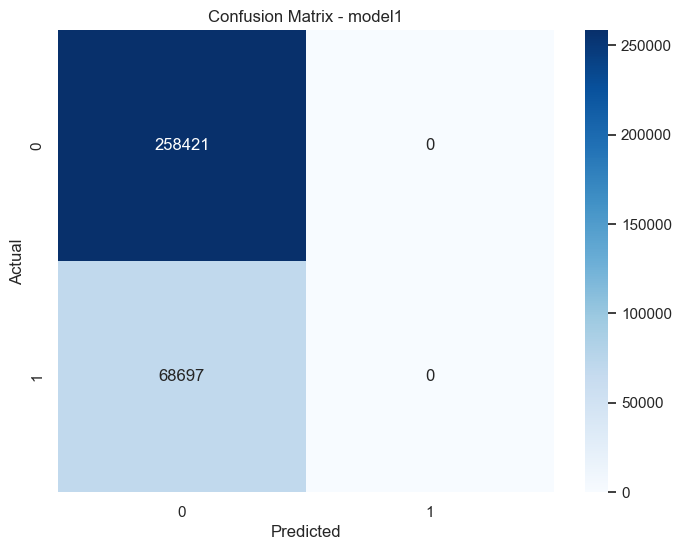

In [65]:
plot_confusion_matrix(y_test, y_pred, model_name="model1")

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

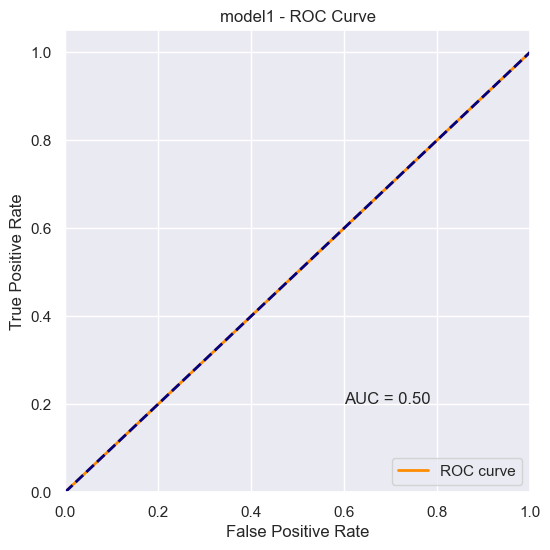

In [66]:
plot_roc(y_test, y_pred, model_name="model1") # Enter you code here

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


On the test set, the model's accuracy is 79.0%.  
While this may appear fair at first, it is critical to compare it to the performance of the training set.  
If the model's accuracy on the training set is much greater, it may suggest overfitting, which occurs when the model learns the training data too well but fails to generalise to unobserved data.

The classification report demonstrates that accuracy, recall, and F1-score differ significantly between classes 0 (no delay) and 1 (delay).  
Precision, recall, and F1-score are all relatively poor for class 1, indicating that the model fails to properly identify flight delays.
The recall for class 1 is especially poor (0.0), indicating that the model is incapable of detecting delayed aircraft.

According to the confusion matrix, the model correctly predicted 258,421 cases of class 0 (no delay) but failed to identify any instances of class 1 (delay).
The accuracy, recall, and F1-score reflect this uneven conclusion, with class 0 metrics very high and class 1 metrics quite low.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [14]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [260]:
data_orig.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,16
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,7


In [117]:
data_orig3 = data_orig.copy()

In [262]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] =data_orig['FlightDate'].isin(holidays).astype(int) # Enter your code here 

In [263]:
data_orig.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay,is_holiday
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21,0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9,0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18,0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,16,0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,7,0


In [264]:
data_orig['is_holiday'].value_counts()

0    1591678
1      43912
Name: is_holiday, dtype: int64

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [15]:
# download data from the link above and place it into the data folder

In [122]:
import requests
import csv
# URL of the file to download
url = " https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31"  # Replace with the actual URL

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the file name from the URL
    file_name = "weather_data_web.csv"

    # Save the downloaded content to a file in the current directory
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f"File '{file_name}' has been downloaded and saved in the current directory.")
else:
    print("Failed to download the file.")

File 'weather_data_web.csv' has been downloaded and saved in the current directory.


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [265]:
weather = pd.read_csv("weather_data_web.csv") # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map =station_map = {
    'USW00023174': 'LAX',
    'USW00012960': 'IAH',
    'USW00003017': 'DEN',
    'USW00094846': 'ORD',
    'USW00013874': 'ATL',
    'USW00023234': 'SFO',
    'USW00003927': 'DFW',
    'USW00023183': 'PHX',
    'USW00013881': 'CLT'
} # Enter your code here 
weather['airport'] =weather['STATION'].map(station_map) # Enter your code here 

In [266]:
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX


Create another column called `MONTH` from the `DATE` column.

In [267]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [268]:
weather.isna().sum()

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64

In [269]:
weather['SNOW'].value_counts()

0.0      8824
3.0        34
5.0        30
10.0       17
8.0        17
25.0       17
18.0       14
15.0       13
20.0       11
13.0       11
43.0       10
58.0        9
56.0        8
51.0        6
36.0        6
23.0        6
33.0        6
38.0        5
28.0        5
46.0        5
97.0        4
30.0        4
76.0        4
41.0        4
86.0        4
71.0        3
94.0        3
64.0        3
69.0        3
61.0        3
66.0        3
81.0        2
48.0        2
79.0        2
99.0        2
130.0       2
74.0        2
145.0       2
53.0        2
107.0       2
127.0       1
137.0       1
411.0       1
178.0       1
163.0       1
157.0       1
84.0        1
142.0       1
147.0       1
221.0       1
89.0        1
152.0       1
91.0        1
104.0       1
300.0       1
333.0       1
119.0       1
175.0       1
196.0       1
117.0       1
Name: SNOW, dtype: int64

In [270]:
weather.shape

(14608, 11)

In [271]:
# Check for missing values in all columns
missing_values = weather.isna().sum()

# Handle missing values in the "SNOW" and "SNWD" columns by filling with zeros
weather['SNOW'].fillna(0, inplace=True)
weather['SNWD'].fillna(0, inplace=True)

# Check for missing values in all columns again after filling
missing_values_after_fillna = weather.isna().sum()

# Display the missing values count before and after filling
print("Missing values count before filling:")
print(missing_values)
print("\nMissing values count after filling:")
print(missing_values_after_fillna)

Missing values count before filling:
STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64

Missing values count after filling:
STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64


**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [272]:
# Create an array of indices for all rows in the DataFrame
idx = np.array([i for i in range(len(weather))])

# Find indices of rows with missing values for TAVG
TAVG_idx = idx[weather['TAVG'].isna()]

# Find indices of rows with missing values for TMAX
TMAX_idx = idx[weather['TMAX'].isna()]

# Find indices of rows with missing values for TMIN
TMIN_idx = idx[weather['TMIN'].isna()]

# Print the indices of rows with missing values for TAVG
print("Indices of rows with missing values for TAVG:")
print(TAVG_idx)

Indices of rows with missing values for TAVG:
[ 2130  2131  2132  2133  2134  2135  2136  2137  2138  2139  2140  2141
  2142  2143  2144  2145  2146  2147  2148  2149  2150  2151  2152  2153
  2154  2155  2156  2157  2158  2159  2191  2192  2193  2194  2195  2196
  2197  2198  2199  2200  2201  2202  2203  2204  2205  2206  2207  2208
  2209  2210  2211  2212  2213  2214  2215  2216  2217  2218  2219  2220
  2221 11594]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [273]:
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,0.0,0.0,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,0.0,0.0,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,0.0,0.0,151.0,244.0,83.0,LAX,01


In [274]:
weather_impute = weather.groupby(['MONTH','STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [275]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [276]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [277]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [278]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [279]:
sum(data_orig.isna().any())

8

In [280]:
data_orig.isna().sum()

Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
FlightDate                0
Reporting_Airline         0
Origin                    0
OriginState               0
Dest                      0
DestState                 0
CRSDepTime                0
Cancelled                 0
Diverted                  0
Distance                  0
DistanceGroup             0
ArrDelay                  0
ArrDelayMinutes           0
is_delay                  0
AirTime                   0
DepHourofDay              0
is_holiday                0
AWND_O               132177
PRCP_O               132177
SNOW_O               132177
TAVG_O               132177
AWND_D               131646
PRCP_D               131646
SNOW_D               131646
TAVG_D               131646
dtype: int64

In [281]:
cols_with_null = ['AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D']
data_orig[cols_with_null] = data_orig[cols_with_null].fillna(data_orig[cols_with_null].median())

In [282]:
sum(data_orig.isna().any())

0

In [149]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHour',
       'DepHourofDay', 'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

In [295]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

In [298]:
data_orig['is_delay'].value_counts()

0.0    1292258
1.0     343332
Name: is_delay, dtype: int64

In [296]:
## Save file for tableau
data_orig.to_csv('data_tableau.csv', index = False)

Convert the categorical data into numerical data using one-hot encoding.

In [283]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [284]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [285]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [286]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [289]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
data.to_csv('combined_csv_v2.csv', index = False)

Create the training and testing sets again.

In [290]:
X = data.drop('target', axis = 1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [291]:
# Create a Logistic Regression model
model2 = LogisticRegression()

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model2.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)# <write code here>

In [292]:
plot_confusion_classification(y_test, y_pred, model_name="model2")

[[256229   2192]
 [ 66567   2130]]
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88    258421
         1.0       0.49      0.03      0.06     68697

    accuracy                           0.79    327118
   macro avg       0.64      0.51      0.47    327118
weighted avg       0.73      0.79      0.71    327118

78.98% Accurate


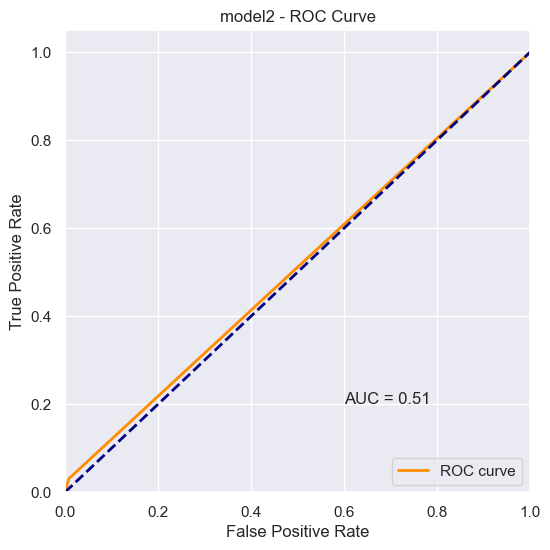

In [293]:
plot_roc(y_test, y_pred, model_name="model2")

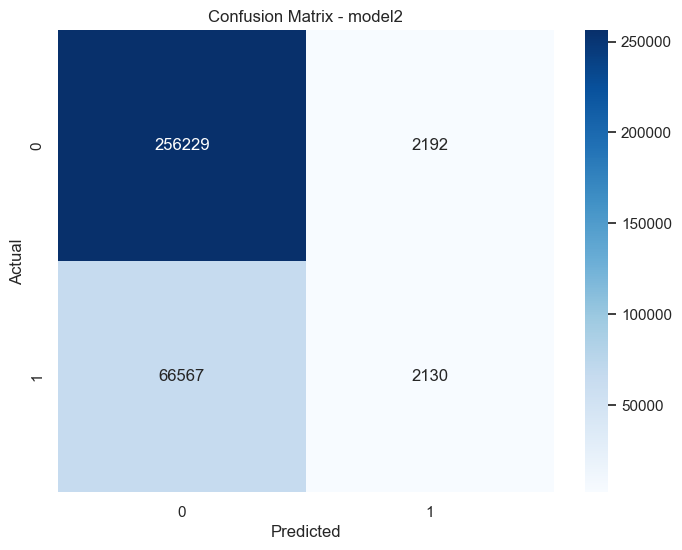

In [294]:
plot_confusion_matrix(y_test, y_pred, model_name="model2")

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

In [17]:
# Enter answer here and turn the cell type into markdown


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [19]:
https://public.tableau.com/app/profile/radhey.gawand/viz/Final_assignment_dashboard/Dashboard1?publish=yes # copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [18]:
# write your answers here